<a href="https://colab.research.google.com/github/sree38/Write-a-python-program-to-predict-if-a-loan-will-get-approved-or-not./blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Write a program to predict the eligibility of a customer for loan disbursement.**

**Process**

1. Getting the system ready and loading the data

2. Understanding the data

3.  Model Building: Part 1

4. Logistic Regression using stratified k-folds cross-validation


**Important Libraries**


Python

Pandas

matplotlib 

seaborn

sklearn


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
train=pd.read_csv("train.csv")
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
test=pd.read_csv("test.csv")
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
print(train.shape, test.shape)

(614, 13) (367, 12)


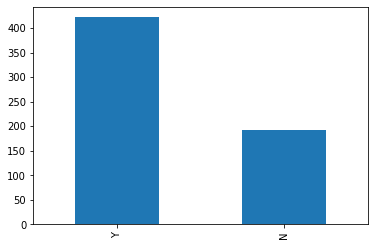

In [ ]:
train['Loan_Status'].value_counts().plot.bar()

Categorical features: These features have categories (Gender, Married ,Self_Employed, Credit_History, Loan_Status)

Ordinal features: Variables in categorical features having some order involved
(Dependents, Education, Property_Area)


Numerical features: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

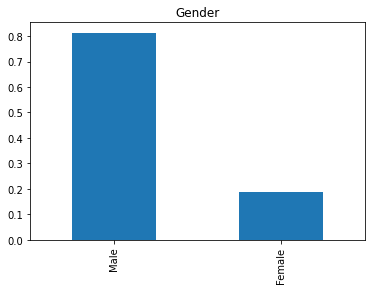

In [ ]:
train['Gender'].value_counts(normalize=True).plot.bar(title='Gender')


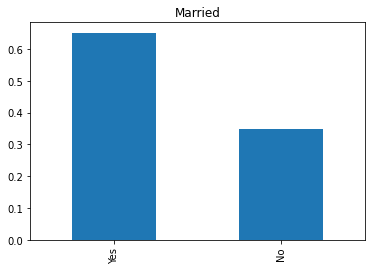

In [ ]:
train['Married'].value_counts(normalize=True).plot.bar(title='Married')

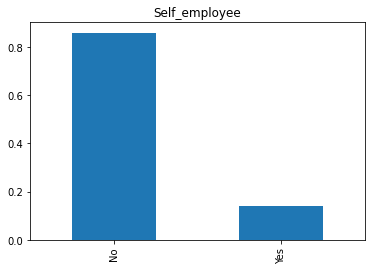

In [ ]:
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_employee')

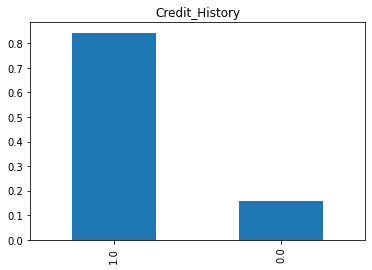

In [ ]:
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')

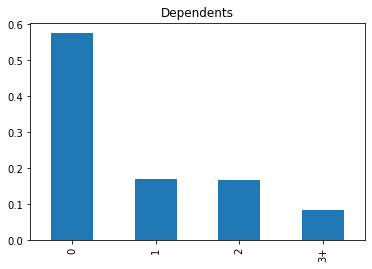

In [ ]:
train['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents')

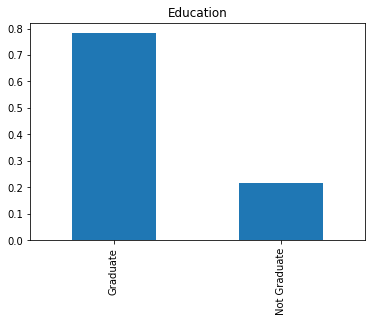

In [ ]:
train['Education'].value_counts(normalize=True).plot.bar(title='Education')

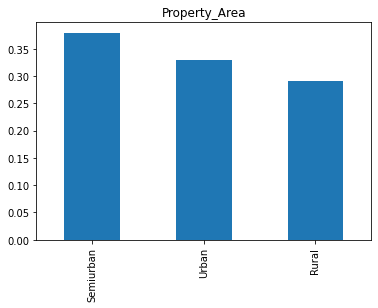

In [ ]:
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')

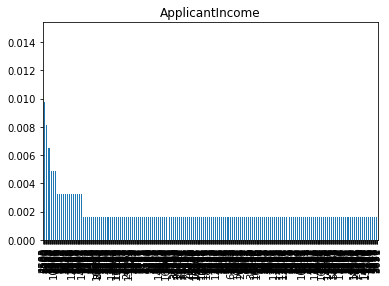

In [ ]:
train['ApplicantIncome'].value_counts(normalize=True).plot.bar(title='ApplicantIncome')

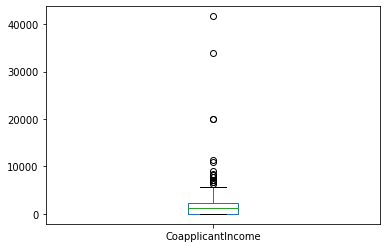

In [ ]:
train['CoapplicantIncome'].plot.box()

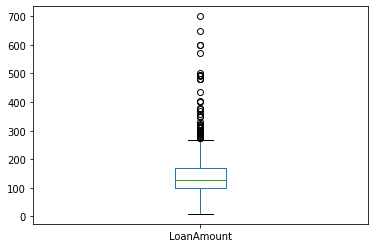

In [ ]:
train['LoanAmount'].plot.box()

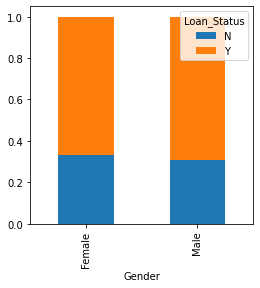

In [ ]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

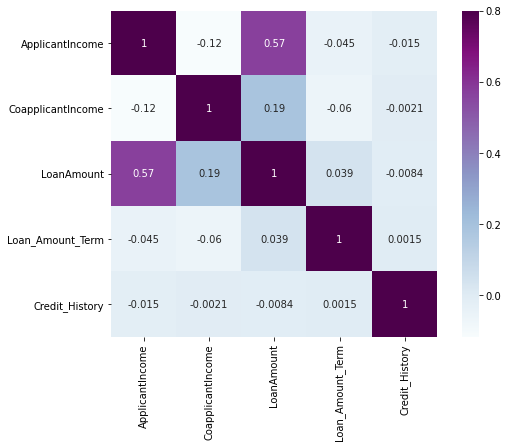

In [ ]:
matrix=train.corr()
f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu",annot=True)

In [ ]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
print(train['Gender'])

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object


In [ ]:
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
print(train['Married'])

0       No
1      Yes
2      Yes
3      Yes
4       No
      ... 
609     No
610    Yes
611    Yes
612    Yes
613     No
Name: Married, Length: 614, dtype: object


In [ ]:
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
print(train['Dependents'])

0       0
1       1
2       0
3       0
4       0
       ..
609     0
610    3+
611     1
612     2
613     0
Name: Dependents, Length: 614, dtype: object


In [ ]:
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
print(train['Self_Employed'])

0       No
1       No
2      Yes
3       No
4       No
      ... 
609     No
610     No
611     No
612     No
613    Yes
Name: Self_Employed, Length: 614, dtype: object


In [ ]:
train['LoanAmount'].fillna(train['LoanAmount'].mode()[0],inplace=True)
print(train['LoanAmount'])

0      120.0
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64


In [ ]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean(),inplace=True)
print(train['LoanAmount'])

0      120.0
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64


In [ ]:
train['Credit_History'].fillna(train['Credit_History'].mean(),inplace=True)
print(train['Credit_History'])

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 614, dtype: float64


In [ ]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
X=train.drop('Loan_Status',1)
#X=train.drop('Loan_ID')
X=X.drop('Loan_ID',axis=1)
Y=train['Loan_Status']

X=pd.get_dummies(X)

print(X)
print(Y)

     ApplicantIncome  ...  Property_Area_Urban
0               5849  ...                    1
1               4583  ...                    0
2               3000  ...                    1
3               2583  ...                    1
4               6000  ...                    1
..               ...  ...                  ...
609             2900  ...                    0
610             4106  ...                    0
611             8072  ...                    1
612             7583  ...                    1
613             4583  ...                    0

[614 rows x 20 columns]
0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object


In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
clf=model.fit(X,Y)
df=pd.read_csv('test.csv')
print(df)


      Loan_ID Gender Married  ... Loan_Amount_Term Credit_History Property_Area
0    LP001015   Male     Yes  ...            360.0            1.0         Urban
1    LP001022   Male     Yes  ...            360.0            1.0         Urban
2    LP001031   Male     Yes  ...            360.0            1.0         Urban
3    LP001035   Male     Yes  ...            360.0            NaN         Urban
4    LP001051   Male      No  ...            360.0            1.0         Urban
..        ...    ...     ...  ...              ...            ...           ...
362  LP002971   Male     Yes  ...            360.0            1.0         Urban
363  LP002975   Male     Yes  ...            360.0            1.0         Urban
364  LP002980   Male      No  ...            360.0            NaN     Semiurban
365  LP002986   Male     Yes  ...            360.0            1.0         Rural
366  LP002989   Male      No  ...            180.0            1.0         Rural

[367 rows x 12 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
#df['Loan_Amount_Term'].fillna(df[Loan_Amount_Term].mean(),inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(),inplace=True)

In [ ]:
df.isnull().sum()
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [ ]:
df=df.drop('Loan_ID',axis=1)
df=pd.get_dummies(df)
print(X)
print(df)


     ApplicantIncome  ...  Property_Area_Urban
0               5849  ...                    1
1               4583  ...                    0
2               3000  ...                    1
3               2583  ...                    1
4               6000  ...                    1
..               ...  ...                  ...
609             2900  ...                    0
610             4106  ...                    0
611             8072  ...                    1
612             7583  ...                    1
613             4583  ...                    0

[614 rows x 20 columns]
     ApplicantIncome  ...  Property_Area_Urban
0               5720  ...                    1
1               3076  ...                    1
2               5000  ...                    1
3               2340  ...                    1
4               3276  ...                    1
..               ...  ...                  ...
362             4009  ...                    1
363             4158  ...          

In [ ]:
clf.predict(df)

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y